<a href="https://colab.research.google.com/github/Rizkiramdani04/Portofolio_DS_DA/blob/main/Movies_Analytics_KNN_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
movies_data=pd.read_csv('/content/movies_metadata (2).csv')
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45463 non-null  bool   
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45463 non-null  int64  
 3   genres                 45463 non-null  object 
 4   homepage               7779 non-null   object 
 5   id                     45463 non-null  int64  
 6   imdb_id                45446 non-null  object 
 7   original_language      45452 non-null  object 
 8   original_title         45463 non-null  object 
 9   overview               44509 non-null  object 
 10  popularity             45460 non-null  float64
 11  poster_path            45077 non-null  object 
 12  production_companies   45460 non-null  object 
 13  production_countries   45460 non-null  object 
 14  release_date           45376 non-null  object 
 15  re

In [ ]:
movies_data['release_date']=pd.to_datetime(movies_data['release_date'])

In [ ]:
movies_data['release_date'].dtypes

dtype('<M8[ns]')

In [ ]:
movies_data['status'].unique()

array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

In [ ]:
movies_data['original_language'].nunique()

89

In [ ]:
movies_data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,True,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,True,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,True,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,True,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,True,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


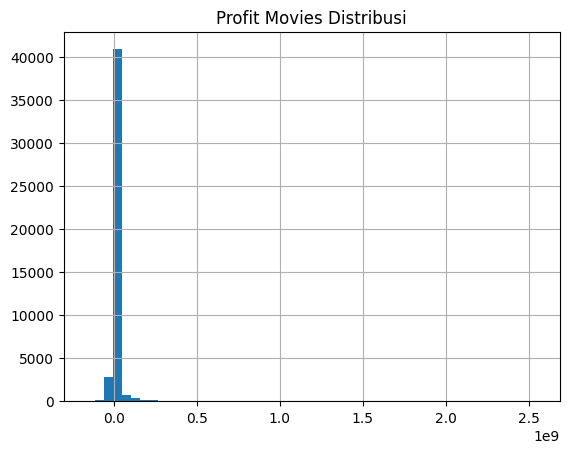

In [ ]:
movies_data['profit']=movies_data['revenue']-movies_data['budget']
movies_data['profit'].hist(bins=50)
plt.title('Profit Movies Distribusi')
plt.show()

In [ ]:
movies_data['profit'].describe()

,profit
count,4.546000e+04
mean,6.984491e+06
std,5.214125e+07
min,-1.657101e+08
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,2.550965e+09


<Axes: >

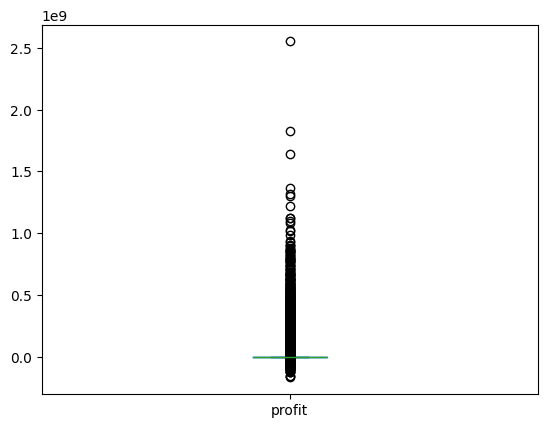

In [ ]:
movies_data['profit'].plot(kind='box')

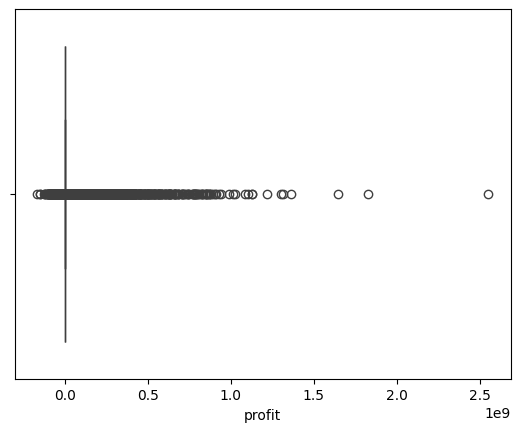

In [ ]:
sns.boxplot(data=movies_data,x='profit')
plt.show()

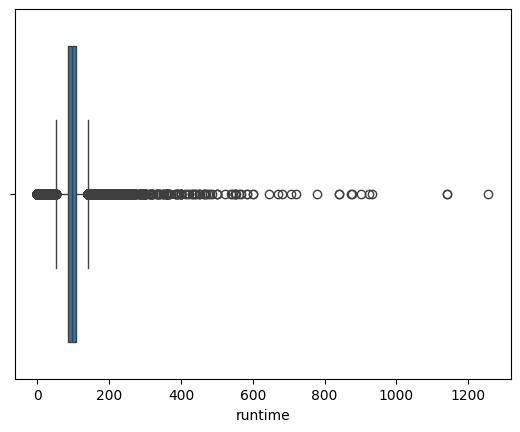

In [ ]:
sns.boxplot(data=movies_data,x='runtime')
plt.show()

In [ ]:
movies_data['profit'].quantile(0.9)

1578210.8999999824

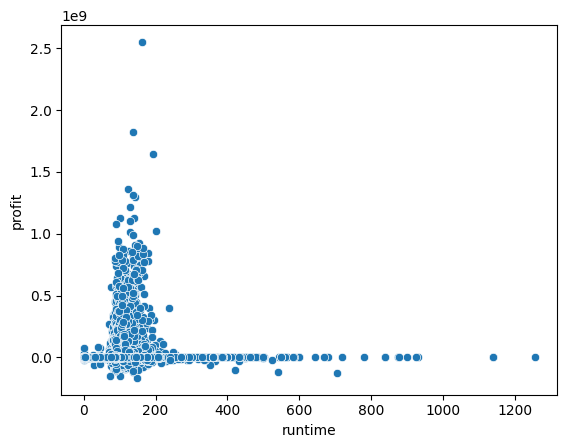

In [ ]:
sns.scatterplot(data=movies_data,
                x='runtime',
                y='profit')
plt.show()

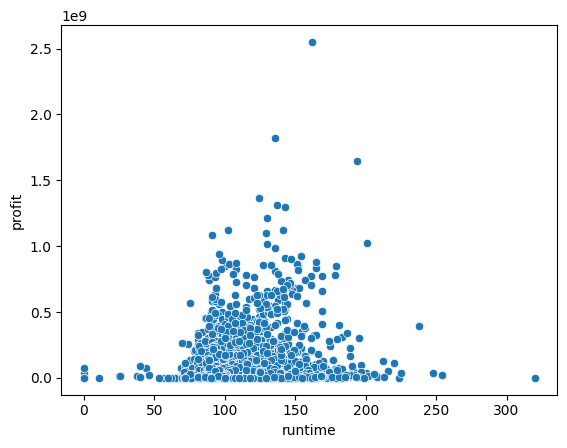

In [ ]:
profitables_movies=movies_data[movies_data['profit']>0]
sns.scatterplot(data=profitables_movies,
                x='runtime',
                y='profit')
plt.show()

In [ ]:
rating=pd.read_csv('/content/ratings_small (2).csv')

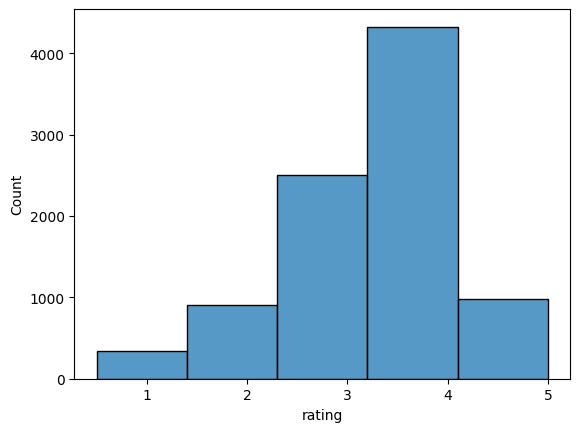

In [ ]:
rating_movies=rating.groupby('movieId',as_index=False)['rating'].median()
sns.histplot(data=rating_movies,bins=5,
             x='rating')
plt.show()

<Axes: ylabel='count'>

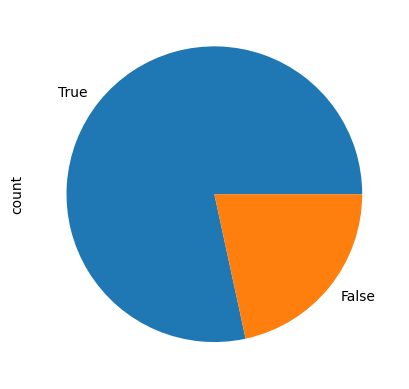

In [ ]:
rating_movies['good_movies']=rating_movies['rating']>=3
rating_movies['good_movies'].value_counts().plot(kind='pie')

In [ ]:
new_df=movies_data.merge(rating_movies,
                         left_on='id',
                         right_on='movieId',
                         how='inner')

<Axes: xlabel='profit', ylabel='Count'>

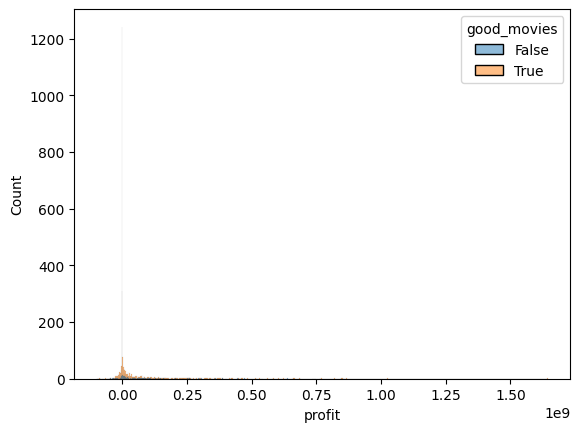

In [ ]:
sns.histplot(data=new_df,
             x='profit',
             hue='good_movies')

<Axes: xlabel='rating', ylabel='profit'>

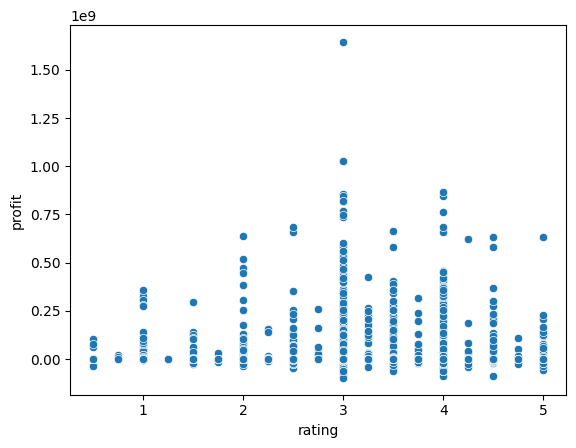

In [ ]:
sns.scatterplot(data=new_df,
                x='rating',
                y='profit')

In [ ]:
new_df[['rating']]

,rating
0,3.75
1,1.50
2,4.00
3,3.50
4,5.00
...,...
2826,3.25
2827,4.00
2828,4.00
2829,4.00


<Axes: xlabel='original_language'>

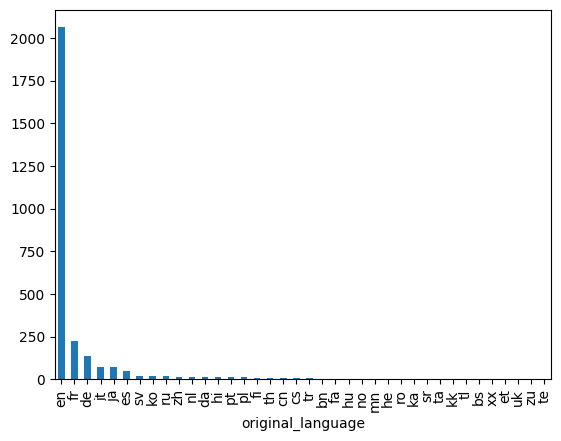

In [ ]:
new_df['original_language'].value_counts().plot(kind='bar')

In [ ]:
new_df.select_dtypes(include='number')

,budget,id,popularity,revenue,runtime,vote_average,vote_count,profit,movieId,rating
0,60000000,949,17.924927,187436818.0,170.0,7.7,1886.0,127436818.0,949,3.75
1,58000000,710,14.686036,352194034.0,130.0,6.6,1194.0,294194034.0,710,1.50
2,98000000,1408,7.284477,10017322.0,119.0,5.7,137.0,-87982678.0,1408,4.00
3,52000000,524,10.137389,116112375.0,178.0,7.8,1343.0,64112375.0,524,3.50
4,16500000,4584,10.673167,135000000.0,136.0,7.2,364.0,118500000.0,4584,5.00
...,...,...,...,...,...,...,...,...,...,...
2826,0,80831,0.083371,0.0,121.0,6.5,2.0,0.0,80831,3.25
2827,0,3104,2.302582,0.0,92.0,5.9,33.0,0.0,3104,4.00
2828,0,64197,0.528657,0.0,97.0,6.0,5.0,0.0,64197,4.00
2829,0,98604,0.803588,0.0,91.0,4.6,6.0,0.0,98604,4.00


In [ ]:
def select_columns(df:pd.DataFrame,features:list,target:list='rating'):
  df=df.dropna().reset_index(drop=True)
  x=df[features]
  y=(df[target]>=3).astype(int)
  return x,y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
features=['budget','popularity','vote_average']
x,y=select_columns(new_df,features=features)

In [ ]:
X_train,y_train,X_test,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

In [ ]:
minmax.fit(X_train)

MinMaxScaler()

In [ ]:
def scaling(df,scaler):
  scaled_array=scaler.transform(df)
  scaled_df=pd.DataFrame(scaled_array,columns=scaler.get_feature_names_out())
  return scaled_df

In [ ]:
# Correct the train_test_split function call
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Modify the scaling function to handle Series and DataFrames
def scaling(df, scaler):
  # Check if the input is a Series and reshape it if necessary
  if isinstance(df, pd.Series):
      df = df.to_frame().T  # Convert Series to DataFrame with single row

  scaled_array = scaler.transform(df)
  scaled_df = pd.DataFrame(scaled_array, columns=scaler.get_feature_names_out())
  return scaled_df

# Now call the scaling function with the correctly split data
x_train_scaled = scaling(X_train, minmax)
x_test_scaled = scaling(X_test, minmax)

In [ ]:
x_test_scaled.iloc[0]

,0
budget,0.500000
popularity,0.042270
vote_average,0.568182


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()

In [ ]:
knn.fit(x_train_scaled,y_train)
dtc.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [ ]:
y_train_pred_knn=knn.predict(x_train_scaled)
y_train_pred_dtc=dtc.predict(x_train_scaled)

In [ ]:
y_test_pred_knn=knn.predict(x_test_scaled)
y_test_pred_dtc=dtc.predict(x_test_scaled)

In [ ]:
pd.crosstab(y_test,y_test_pred_knn)

col_0,0,1
rating,,
0,0,3
1,1,24


In [ ]:
pd.crosstab(y_test,y_test_pred_dtc)

col_0,0,1
rating,,
0,1,2
1,5,20
